n# PyTorch: Building a neural network

PyTorch is a deep learning framework that assists you in creating, training and testing neural networks.
There are other deep learning frameworks such as Tensorflow, MXNet or CNTK.

But PyTorch is sweet:

- Quick to develop and test new ideas
- Automatic differentiation: Calculates derivatives of abritrary functions
- Seamlessly executes on CPU and GPU for great speed-ups
- Has a nice API, very similar to numpy's API




# PyTorch Basics

The PyTorch Documentation is available here: https://pytorch.org/docs/stable/tensors.html


In [1]:
# install if necessary, you probably have to restart the Kernel afterwards!:
# !pip install torch torchvision

In [2]:
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(42) # Setting the seed
print("Using torch", torch.__version__)

Using torch 2.7.1


### Tensor

The fundamental data structure is a `tensor`. 

Tensors are just like numpy ndarrays. But tensors can run on the GPU as well. (Not on this jupyter-hub installation though)

In [3]:
M = torch.Tensor([[1, 2], [3, 4]])
M

tensor([[1., 2.],
        [3., 4.]])

In [4]:
shape = (2, 3)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [5]:
tensor = torch.randint(0, 4, (2, 3))
print(f"Shape of tensor: {tensor.shape}")
print(f"Shape of tensor: {tensor.size(0)}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([2, 3])
Shape of tensor: 2
Datatype of tensor: torch.int64
Device tensor is stored on: cpu


Inplace operations have suffix `_`. So, the method `add_(10)` adds 10 to an existing tensor and modifies it.

In [6]:
t = torch.tensor(3)
t = t + 10
# t.add_(10) # don't do that, it modifies the tensor in place
print(t)

tensor(13)


You can also transpose a tensor, similar to numpy:

In [7]:
W = torch.randn((3, 2))
W

tensor([[ 2.2082, -0.6380],
        [ 0.4617,  0.2674],
        [ 0.5349,  0.8094]])

In [8]:
W.t()

tensor([[ 2.2082,  0.4617,  0.5349],
        [-0.6380,  0.2674,  0.8094]])

Or in-place:

Indexing, slicing, reshaping, transposing, matrix products, element-wise operations work similar like numpy

In [9]:
t = torch.arange(20)
print(t.view(2, 10)) # np.reshape
print(t.view(4,5))

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])
tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])


### Tensors and Numpy

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function:

In [10]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

# And back to numpy array
np_arr_orig = tensor.numpy()
print("Numpy array again:", np_arr_orig)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])
Numpy array again: [[1 2]
 [3 4]]


### Dynamic Computation Graph: Automatic Differentiation

In [11]:
t = torch.randn(1)

Every tensor has the following attributes:

- `requires_grad` : making the tensor a trainable parameter. 
- `data`: provides access to the underlying value of the tensor.
- `grad`: contains the gradient w.r.t to that tensor
- `grad_fn`: stores history of operations in which this tensor was involved.

When we express any kind of computation using tensors, PyTorch creates a **computational graph** behind the scenes. 

The computational graph keeps track of the operations we applied to the tensors. Since PyTorch maintains the computational graph, the built-in AutoGrad toolkit can always calculate the gradient of some tensor with respect to some other tensor.
..and don't need to worry about that.

**Why do we want gradients?**

A neural network is essentially just a function, mapping an input $x$ to an output $\hat{y}$. Then there is the error measure that tells us how wrong the predicted output $\hat{y}$ was compared to some desired output $y$.

Based on this error, we can use the gradient to update the weights that were responsible for the output, so that the next time we present the input $x$, to our network, the output will be closer to what we want.

Neural networks are just functions. But since they are rather complicated functions, let's consider a simpler function:

$$
y = \frac{1}{|\mathbf{x}|} \sum_i [ (x_i + 2)^2 + 3 ] 
$$

Think of $\mathbf{x}$ as the parameters. We want to minimize this function with respect to $\mathbf{x}$.
For this, we want to obtain the gradient $\partial y / \partial \mathbf{x}$. 

In this example, we'll use $\mathbf{x} = [0, 1, 2]$ as our initial values for x.

In [12]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("x", x)

x tensor([0., 1., 2.], requires_grad=True)


Now let’s build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [14]:
x = torch.tensor([0,1,3], dtype=torch.float, requires_grad=True)
a = x + 2
print(a)
b = a ** 2
print(b)
c = b + 3
print(c)
y = c.mean()
print("y", y)

def f(x):
    y = (((x + 2) ** 2) + 3).mean()
    return y
def loss(y, y_hat):
    return (y_hat - y)**2

tensor([2., 3., 5.], grad_fn=<AddBackward0>)
tensor([ 4.,  9., 25.], grad_fn=<PowBackward0>)
tensor([ 7., 12., 28.], grad_fn=<AddBackward0>)
y tensor(15.6667, grad_fn=<MeanBackward0>)


These statements created the following graph:

![](https://uvadlc-notebooks.readthedocs.io/en/latest/_images/pytorch_computation_graph.svg)

The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied. Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor 
. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [15]:
print(x.grad)

None


In [16]:
y.backward()

`x.grad` now contains the gradient $\partial y / \partial \mathbf{x}$. The gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x} = [0, 1, 2]$.

In [17]:
print(x.grad)

tensor([1.3333, 2.0000, 3.3333])


Using the chain rule, we can verify by hand:

$$
\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i} \frac{\partial c_i}{\partial b_i} \frac{\partial b_i}{\partial a_i} \frac{\partial a_i}{\partial x_i}
$$

With the respective partial derivatives as:

$$
\frac{\partial y}{\partial c_i} = \frac{1}{3}, \qquad \frac{\partial c_i}{\partial b_i} = 1, \qquad \frac{\partial b_i}{\partial a_i} = 2 a_i, \qquad \frac{\partial a_i}{\partial x_i} = 1
$$

With input being $\mathbf{x} = [0, 1, 2]$, our gradients are $\partial y / \partial \mathbf{x} = [\frac{4}{3}, 2, \frac{8}{3}]$.

# Creating a neural network

In [18]:
# Transform the data to torch tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    #   transforms.Normalize(),
    transforms.Normalize((0.1307), (0.3081))
])

# how to comupute the mean and std:
# from torchvision import datasets
# trainset = datasets.MNIST('mnist', train=True, download=True)
# mean = trainset.data.float().mean() / 255 # normalize to [0, 1], because each pixel is in [0, 255]
# std = trainset.data.float().std() / 255
# print(mean, std)

# Preparing training set and test set
trainset = torchvision.datasets.MNIST('mnist', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False, download=True, transform=transform)
# Prepare training loader and test loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=0)

# print(next(iter(train_loader))[0][0])

100.0%
100.0%
100.0%
100.0%


In [20]:
class MyLinearLayer(nn.Module):
    def __init__(self, input_size=28*28, output_size=10):
        super(MyLinearLayer, self).__init__()
        # Initialize weights
        self.W = torch.randn(input_size, output_size)
        self.b = torch.zeros(output_size)

    def forward(self, x):
        return x @ self.W + self.b
        # torch.bmm(x, W)
        

mylinearlayer =  MyLinearLayer()

out = mylinearlayer(torch.randn(28*28))  # Example forward pass with random input
print("Output of MyLinearLayer:", out.shape)

linear_layer = nn.Linear(28*28, 10)
linear_layer(torch.randn(28*28))

class NewModule(nn.Module):
    def __init__(self, input_size, output_size, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.fc1 = nn.Linear(input_size, output_size)
        self.fc2 = MyLinearLayer(10, 10)
    def forward(self, x):
        x = F.sigmoid(self.fc2(self.fc1(x)))
        return x

Output of MyLinearLayer: torch.Size([10])


## Inspecting the Handwritten Digits Dataset

In [23]:
trainset_shape = train_loader.dataset.data.shape
testset_shape = test_loader.dataset.data.shape

# Print the computed shapes
print(trainset_shape, testset_shape)

# Compute the size of the minibatch for training set and test set
trainset_batchsize = train_loader.batch_size
testset_batchsize = test_loader.batch_size

# Print sizes of the minibatch
print(trainset_batchsize, testset_batchsize)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
32 32


Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


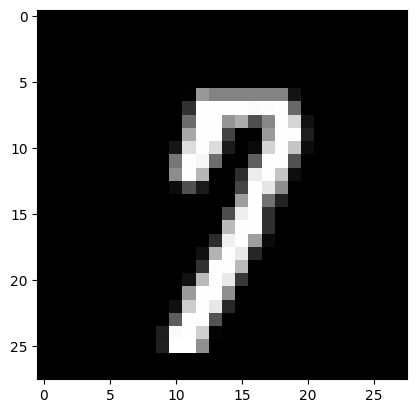

Label: 7


In [25]:
import matplotlib.pyplot as plt

# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[2].squeeze()
label = train_labels[2]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Define model architecture

In [26]:
import torch.nn as nn
import torch.nn.functional as F

# Define the class Net
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, x):
        # Do the forward pass
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return x

In [33]:
import torch.nn as nn
import torch.nn.functional as F

# Define the class Net
class ConvNet(nn.Module):
    def __init__(self, n_chan=4):
        super(ConvNet, self).__init__()
        self.n_chan = n_chan
        self.conv1 = nn.Conv2d(1,n_chan,kernel_size=3,padding=1) # TODO
        self.pooling = nn.MaxPool2d(2, 2) #TODO max pooling or mean pooling? try differnt versions, check how they are doing
        self.fc1 = nn.Linear(n_chan * 14 * 14, 200)
        # TODO: size dpendent on prev layer), 200) #network at the end, similar to what you know from the previous one
        self.clf = nn.Linear(200, 10)
        
    def forward(self, x, analyze=False):
        # Do the forward pass
        conv = self.conv1(x) # [B,4,28,28]
        # print(x.shape)
        pooled = self.pooling(conv) #[B,4,14,14]
        x = F.relu(pooled)
        # print(x.shape)
        x = self.fc1(x.view(x.size(0), -1))  #Flatten: [B, 784]
        # TODO: change the size of the inputs, figure out with debugging/ thinking
        # print(x.shape)
        # x = F.relu(x)
        x = self.clf(x) #[B, 10]
        # print(x.shape)
        if analyze:
            return x, conv, pooled
        return x


In [36]:
#TODO: get some random input, make the network / conv net work
#get one sample from the training set
x =train_features[0].unsqueeze(0) #[1,1,28,28]
# instantiate the model
model = ConvNet()
#forward pass
output = model(x)
print("Output shape", output.shape)

Output shape torch.Size([1, 10])


## Training the FFN network

In [37]:
import torch.optim as optim

# Instantiate the Adam optimizer and Cross-Entropy loss function
model = Net()

optimizer = optim.SGD(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
train_epochs = 20
mean_losses = []
for epoch in range(train_epochs):
    losses = []
    for batch_idx, data_target in enumerate(train_loader):
        data = data_target[0]
        target = data_target[1]
 
        data = data.view(-1, 28 * 28)
        optimizer.zero_grad()
        # Compute a forward pass
        output = model(data)
        # Compute the loss gradients and change the weights
        loss = criterion(output, target)
        losses.append(loss)
        # losses.append(loss.item())
        loss.backward()
        optimizer.step()
    mean_loss = torch.mean(torch.tensor(losses))
    print(f'epoch: {epoch} loss: {mean_loss}')

# print([(i, l) for i, l in enumerate(mean_losses)])

epoch: 0 loss: 2.24045991897583
epoch: 1 loss: 2.10305118560791
epoch: 2 loss: 1.9663745164871216
epoch: 3 loss: 1.8266799449920654
epoch: 4 loss: 1.6875009536743164
epoch: 5 loss: 1.554063320159912
epoch: 6 loss: 1.43060302734375
epoch: 7 loss: 1.3195053339004517
epoch: 8 loss: 1.2212570905685425
epoch: 9 loss: 1.1352647542953491
epoch: 10 loss: 1.0603519678115845
epoch: 11 loss: 0.9951081871986389
epoch: 12 loss: 0.938180148601532
epoch: 13 loss: 0.8883558511734009
epoch: 14 loss: 0.844559371471405
epoch: 15 loss: 0.8058871030807495
epoch: 16 loss: 0.7715479135513306
epoch: 17 loss: 0.7409549355506897
epoch: 18 loss: 0.713556170463562
epoch: 19 loss: 0.6888483166694641


In [ ]:
mean_losses

In [39]:
correct, total = 0, 0

# Set the model in eval mode
model.eval()

for i, data in enumerate(test_loader):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28 * 28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1) # TODO: think about what is happening here
    
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
    
print('The test set accuracy of the network is: %d %%' % (100 * correct / total)) 

The test set accuracy of the network is: 86 %


# Training the ConvNet

In [40]:
import torch.optim as optim

# Instantiate the Adam optimizer and Cross-Entropy loss function
model = ConvNet(n_chan=16)

optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
for epoch in range(2):
    epoch_losses = []
    for batch_idx, data_target in enumerate(train_loader):
        data = data_target[0]
        target = data_target[1]
        
        optimizer.zero_grad() # TODO: what's differnt? 
        
        # Compute a forward pass
        output = model(data)
        
        # Compute the loss gradients and change the weights
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
    print(f'Train Loss after epoch {epoch}: {torch.mean(torch.tensor(epoch_losses))}')

Train Loss after epoch 0: 0.18810507655143738
Train Loss after epoch 1: 0.07570642232894897


## Using the ConvNet to make predictions

In [41]:
correct, total = 0, 0

# Set the model in eval mode
model.eval()

for i, data in enumerate(test_loader):
    inputs, labels = data
    
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
    
print('The test set accuracy of the network is: %d %%' % (100 * correct / total)) 

The test set accuracy of the network is: 98 %


(4, 2)


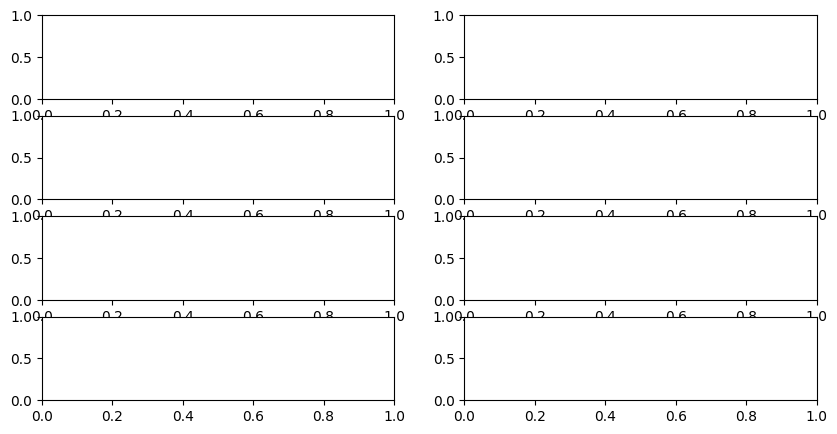

In [43]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(4,2, figsize=(10,5))
print(axs.shape)


# Analyzing the Learned Filters

In [45]:
# Set the model in eval mode
model.eval()
untrained_model = ConvNet()
untrained_model.eval()
conved_features = {k: [] for k in range(10)}
pooled_features = {k: [] for k in range(10)}
for i, (inputs, label) in enumerate(zip(train_features, train_labels)):
    
    # Do the forward pass and get the predictions
    inputs = inputs.unsqueeze(0)
    x, conv, pooled = untrained_model(inputs, analyze=True)
    conved_features[label.item()].append(conv.detach().numpy())
    pooled_features[label.item()].append(pooled.detach().numpy())


TypeError: Invalid shape (4, 14, 14) for image data

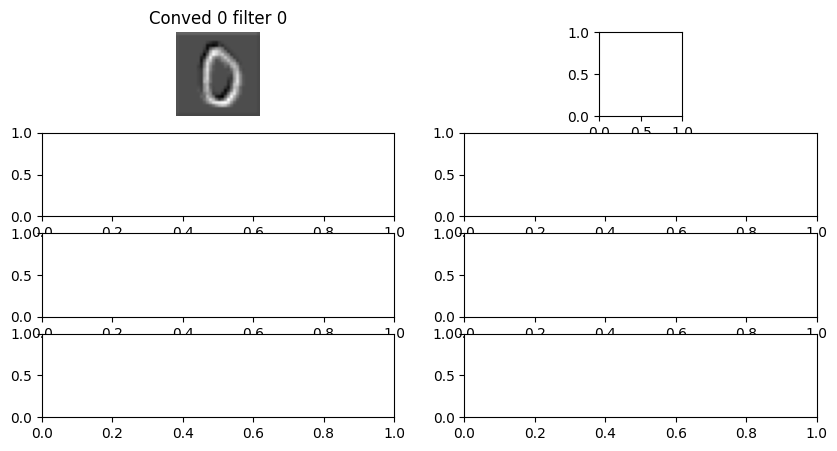

In [50]:
for i in range(10):
    if len(conved_features.get(i)) == 0:
        continue
    for n in range(len(conved_features.get(i))):
        conved = conved_features.get(i)[n]
        pooled = pooled_features.get(i)[n]
        fig, axs = plt.subplots(4, 2, figsize=(10, 5))
        for filt in range(4):
            img1 = conved[filt][0]
            img2 = pooled[filt][0]
            if img1.ndim == 3:
                img1 = img1.squeeze()
            if img2.ndim == 3:
                img2 = img2.squeeze()
        # Plot the first image
            axs[filt][0].imshow(img1, cmap='gray')
            axs[filt][0].set_title(f'Conved {i} filter {filt}')
            axs[filt][0].axis('off')  # Hide the axis
        
            # Plot the second image
            axs[filt][1].imshow(pooled[filt], cmap='gray')
            axs[filt][1].set_title(f'Pooled {i} filter:{filt}')
            axs[filt][1].axis('off')  # Hide the axis
        
        # Display the plots
        plt.tight_layout()
        plt.show()
        print(30 * '---')

## Using the network to make predictions

In [54]:
correct, total = 0, 0

# Set the model in eval mode
model.eval()

for i, data in enumerate(test_loader):
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1,1, 28 , 28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('The test set accuracy of the network is: %d %%' % (100 * correct / total)) 

The test set accuracy of the network is: 98 %


# Checking convolution and pooling operations

In [55]:
print(len(train_features))
print(len(train_labels))

32
32


In [56]:
max_pool = torch.nn.MaxPool2d(kernel_size=(4,4), stride=4, padding=2)
mean_pool = torch.nn.AvgPool2d(kernel_size=(4,4), stride=4, padding=2)

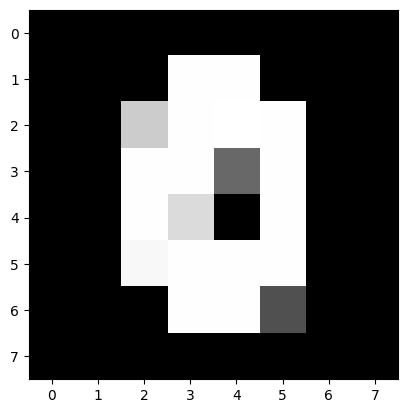

Label: 0, max pooled


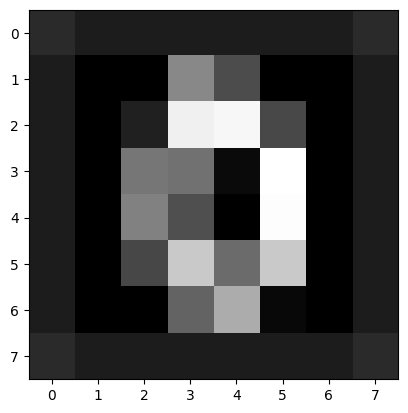

Label: 0, mean pooled


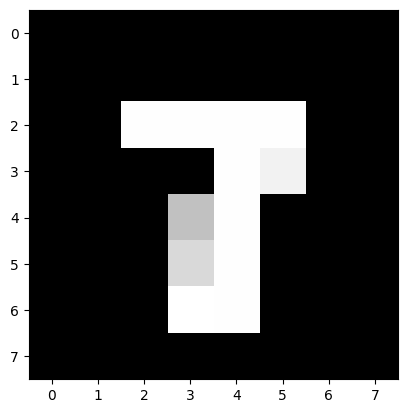

Label: 7, max pooled


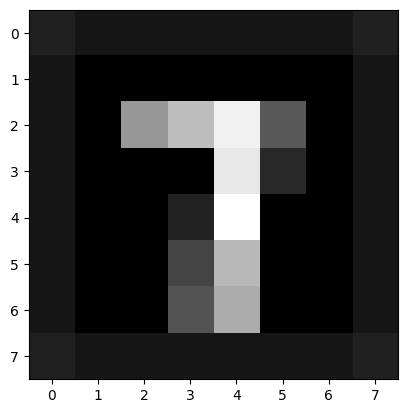

Label: 7, mean pooled


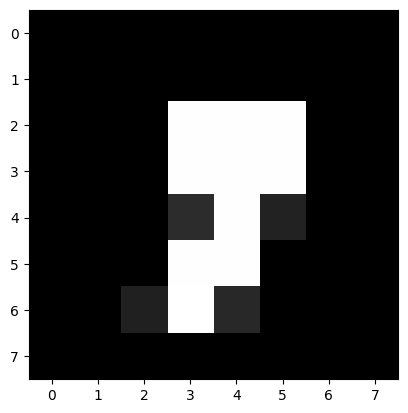

Label: 7, max pooled


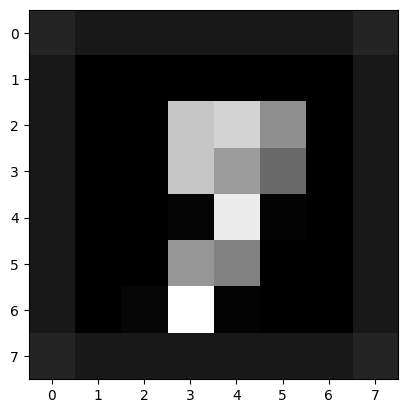

Label: 7, mean pooled


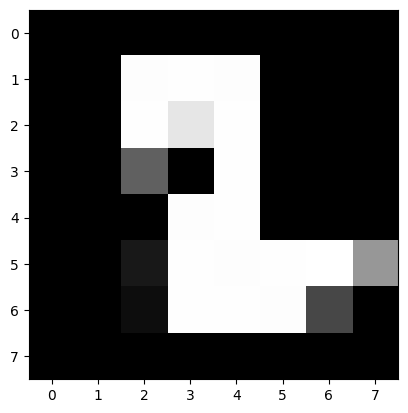

Label: 2, max pooled


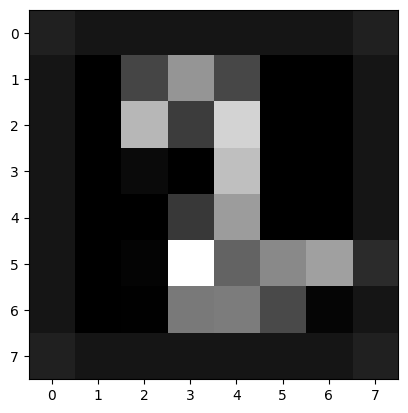

Label: 2, mean pooled


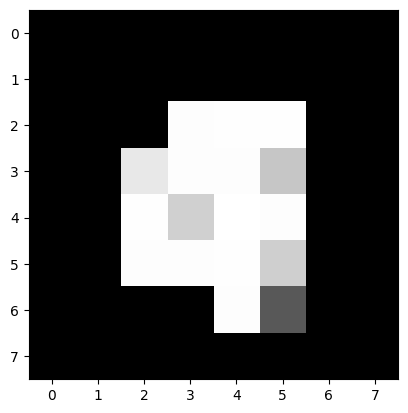

Label: 9, max pooled


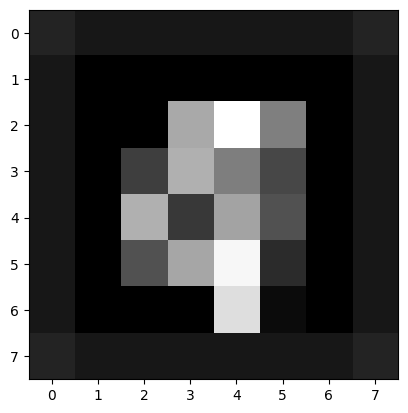

Label: 9, mean pooled


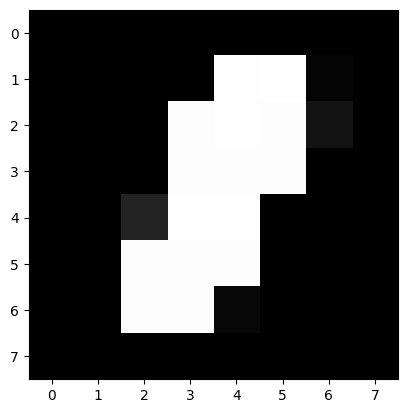

Label: 8, max pooled


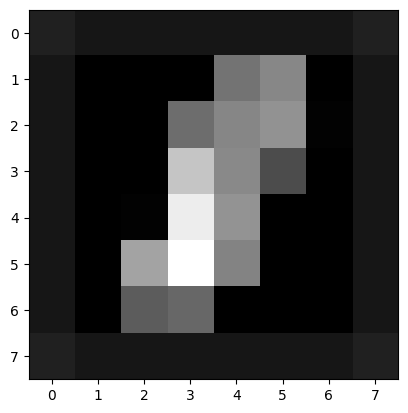

Label: 8, mean pooled


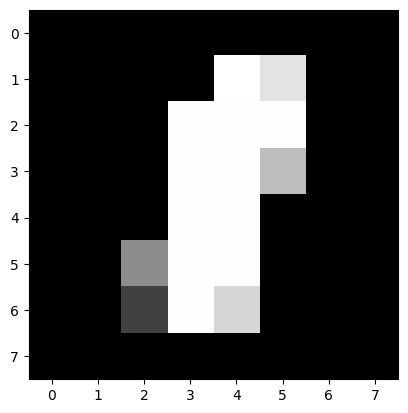

Label: 8, max pooled


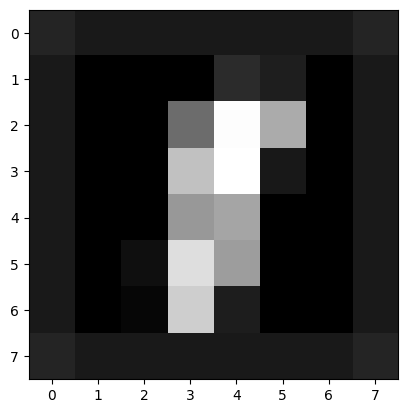

Label: 8, mean pooled


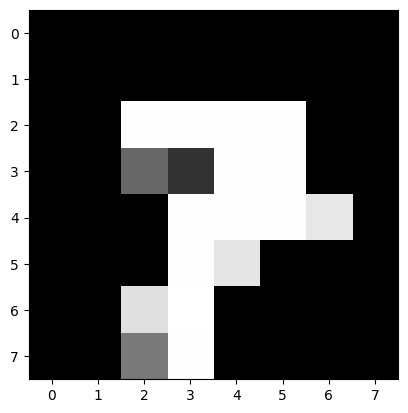

Label: 7, max pooled


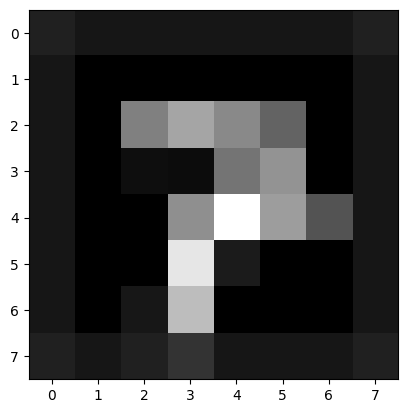

Label: 7, mean pooled


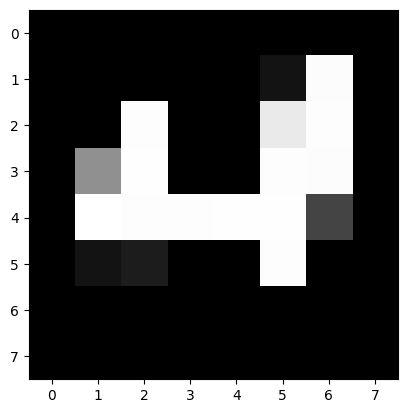

Label: 4, max pooled


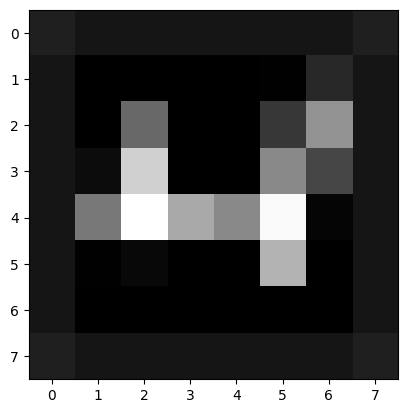

Label: 4, mean pooled


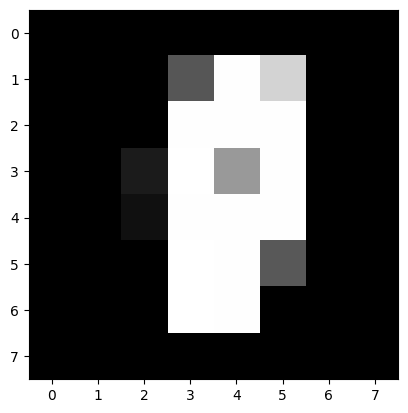

Label: 0, max pooled


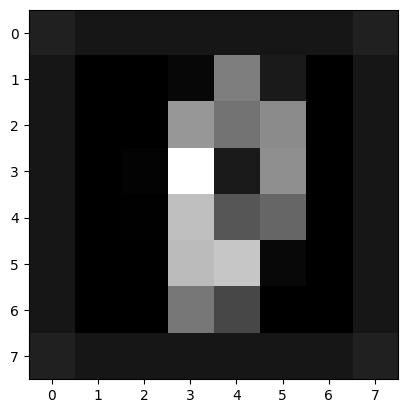

Label: 0, mean pooled


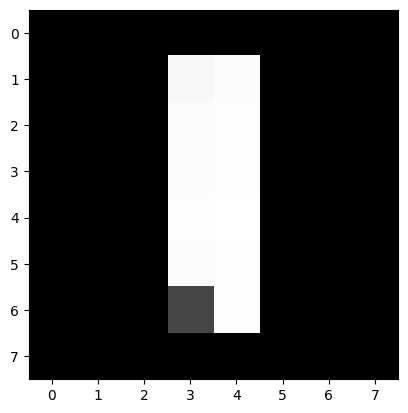

Label: 1, max pooled


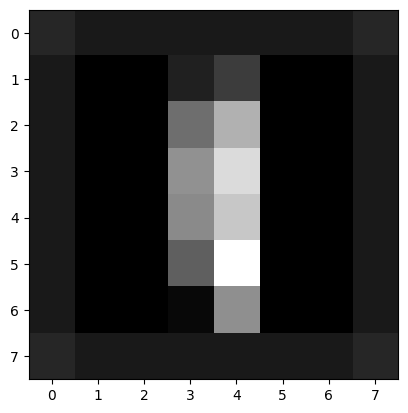

Label: 1, mean pooled


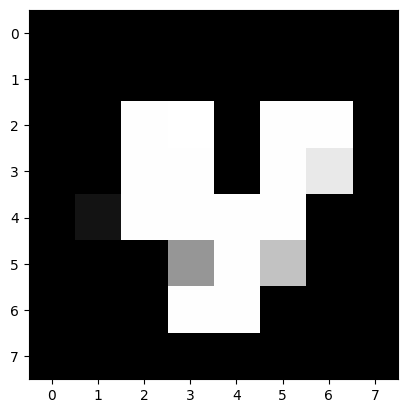

Label: 4, max pooled


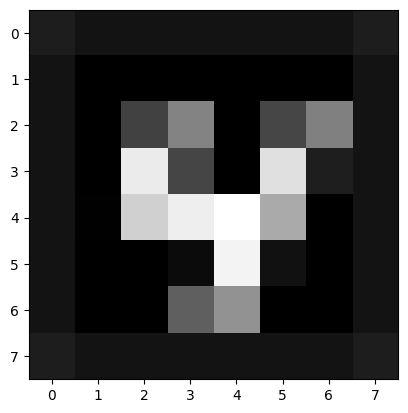

Label: 4, mean pooled


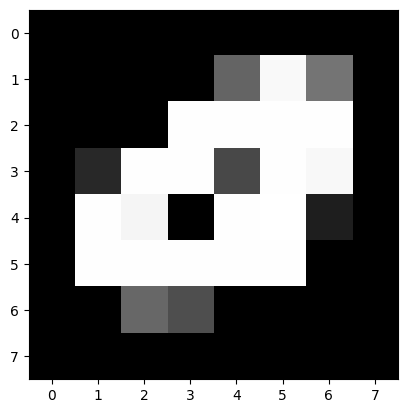

Label: 0, max pooled


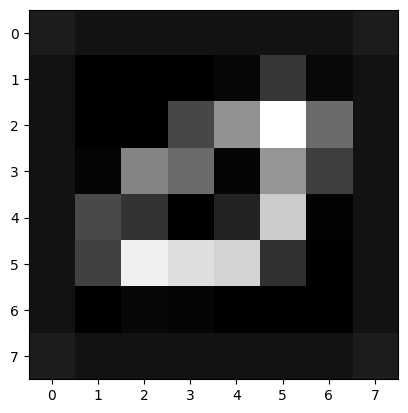

Label: 0, mean pooled


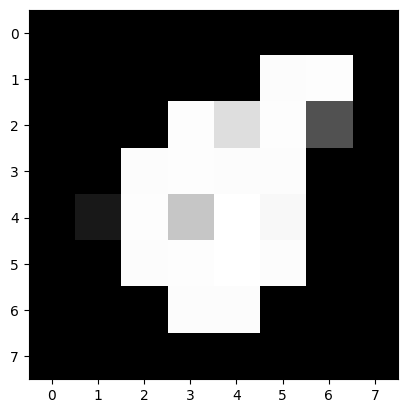

Label: 4, max pooled


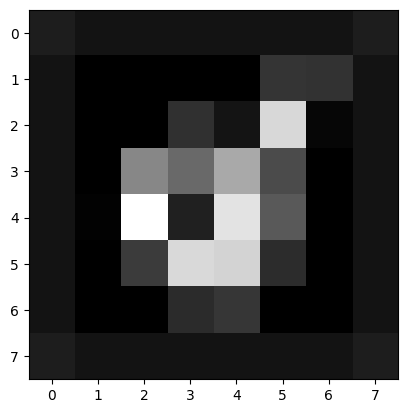

Label: 4, mean pooled


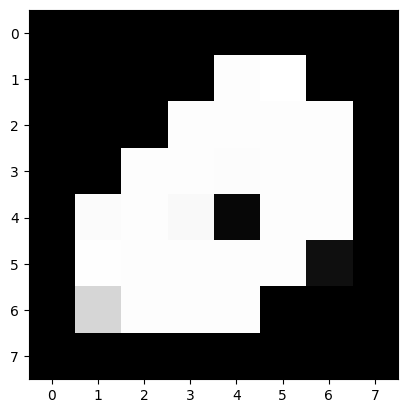

Label: 0, max pooled


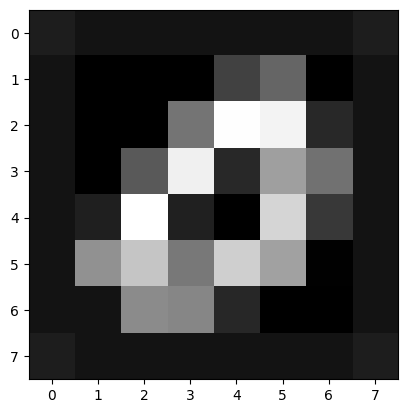

Label: 0, mean pooled


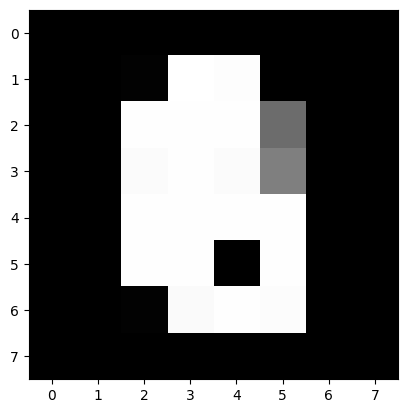

Label: 8, max pooled


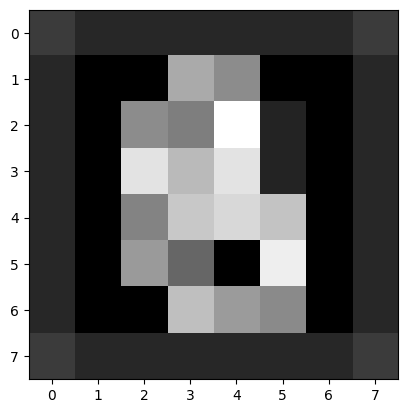

Label: 8, mean pooled


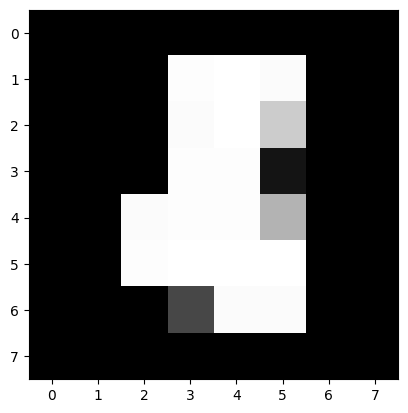

Label: 2, max pooled


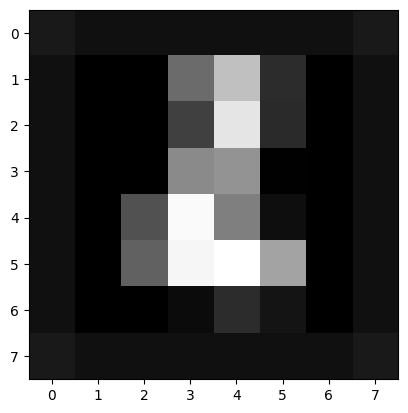

Label: 2, mean pooled


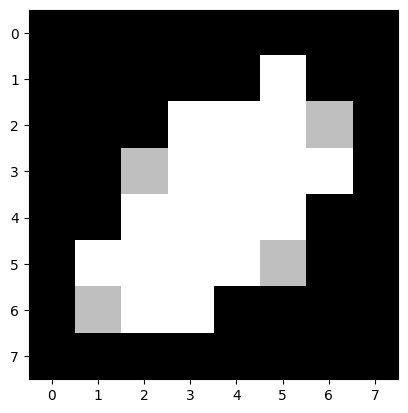

Label: 0, max pooled


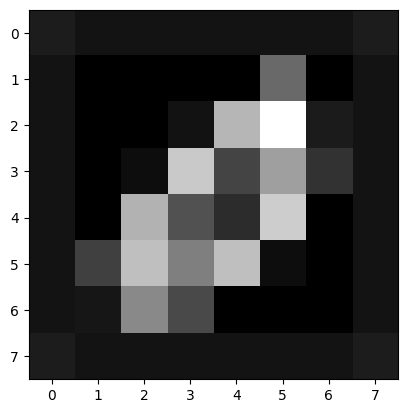

Label: 0, mean pooled


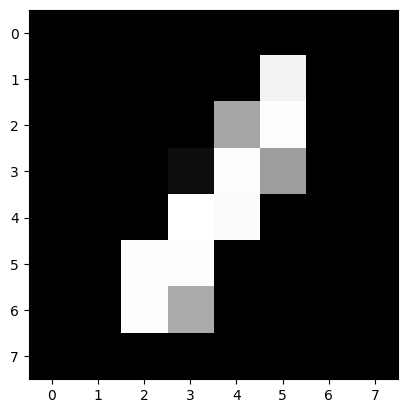

Label: 1, max pooled


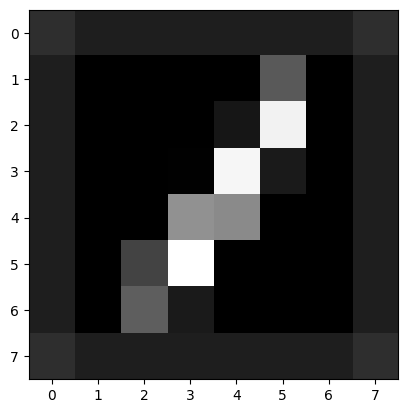

Label: 1, mean pooled


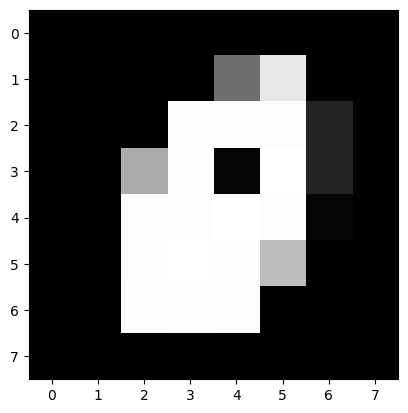

Label: 0, max pooled


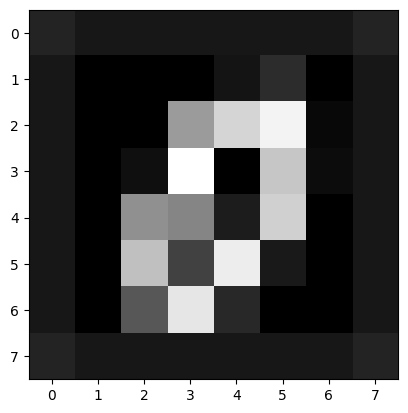

Label: 0, mean pooled


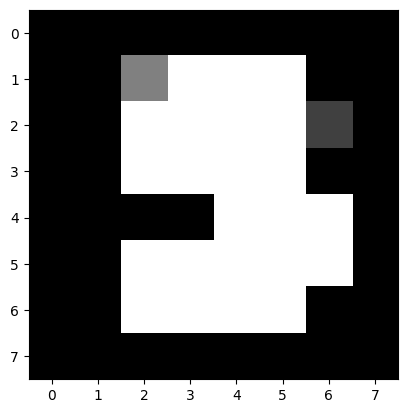

Label: 5, max pooled


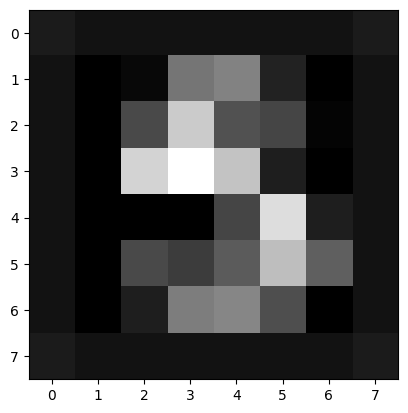

Label: 5, mean pooled


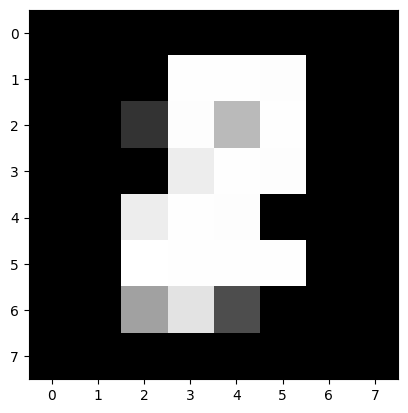

Label: 2, max pooled


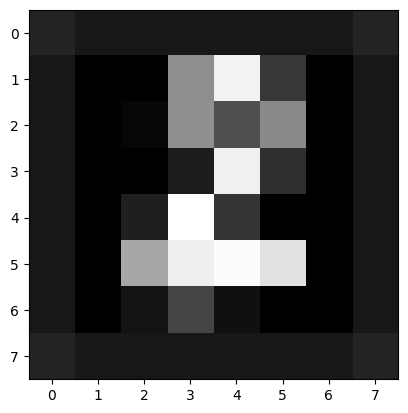

Label: 2, mean pooled


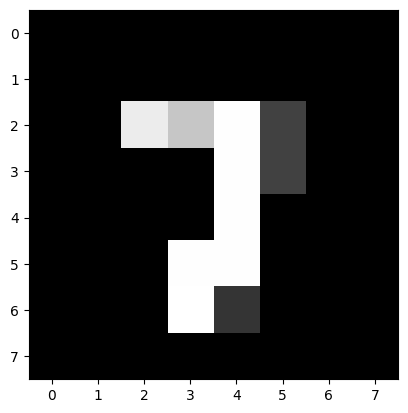

Label: 7, max pooled


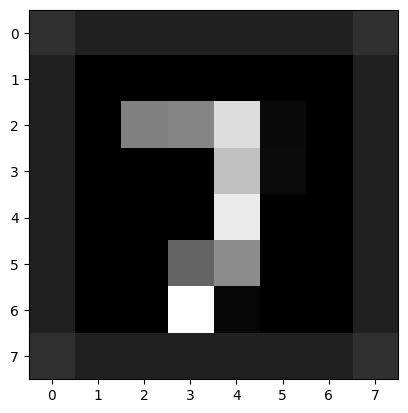

Label: 7, mean pooled


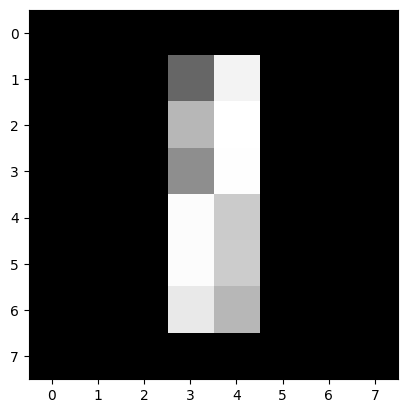

Label: 1, max pooled


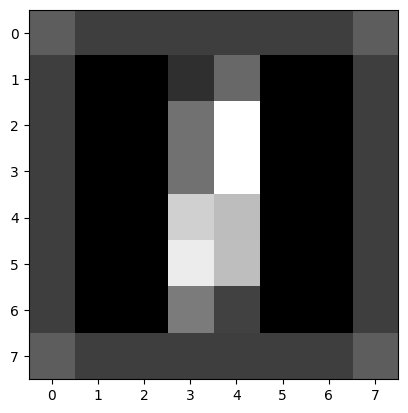

Label: 1, mean pooled


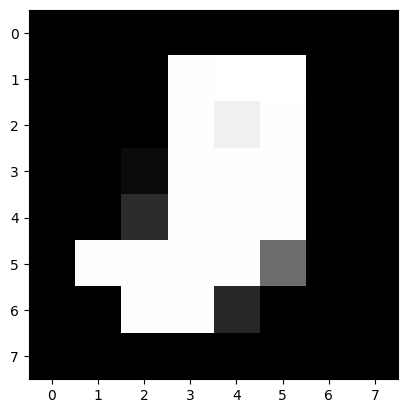

Label: 3, max pooled


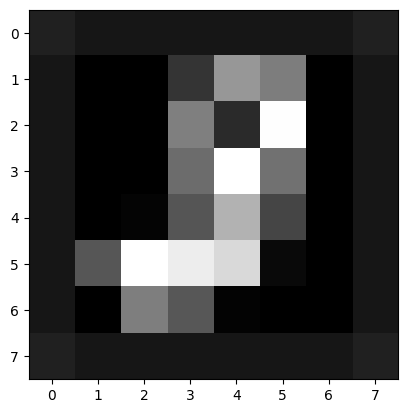

Label: 3, mean pooled


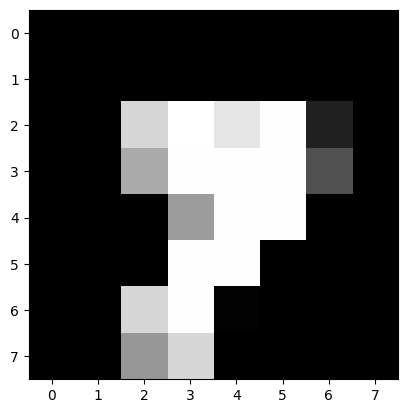

Label: 7, max pooled


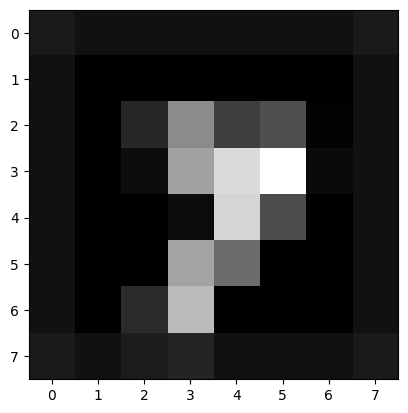

Label: 7, mean pooled


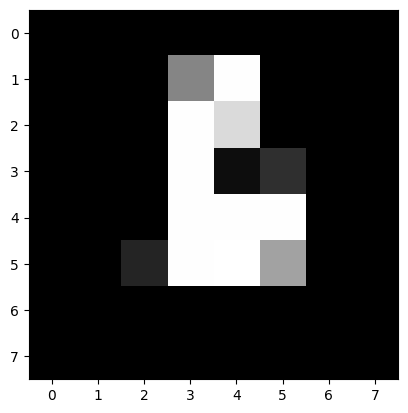

Label: 6, max pooled


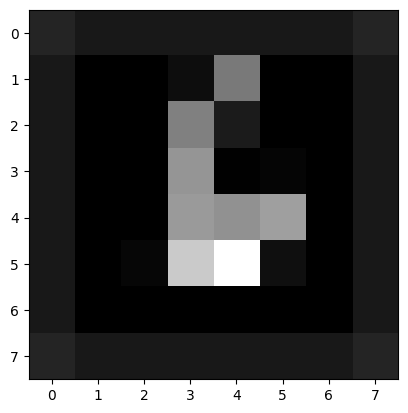

Label: 6, mean pooled


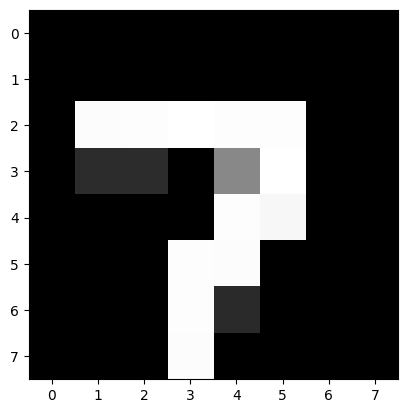

Label: 7, max pooled


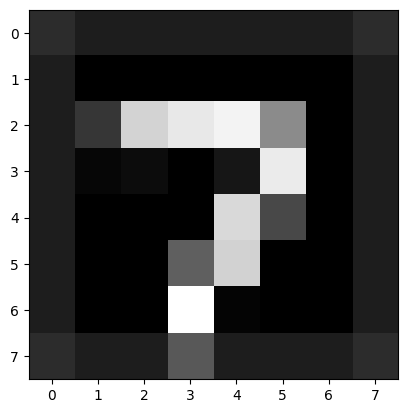

Label: 7, mean pooled


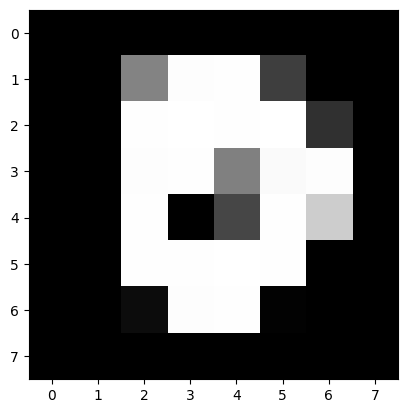

Label: 0, max pooled


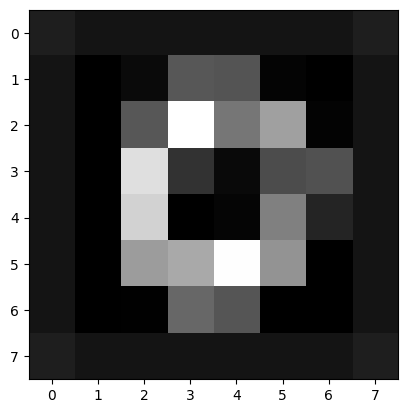

Label: 0, mean pooled


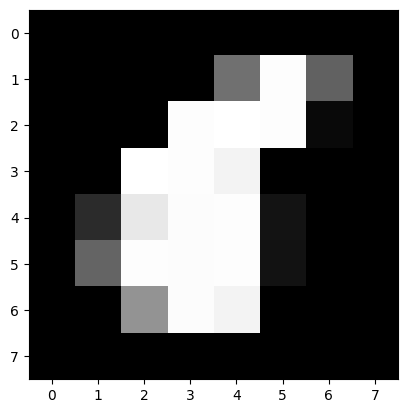

Label: 5, max pooled


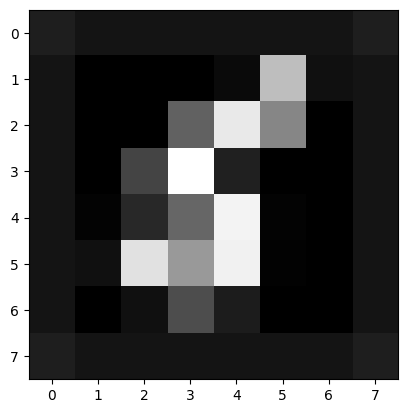

Label: 5, mean pooled


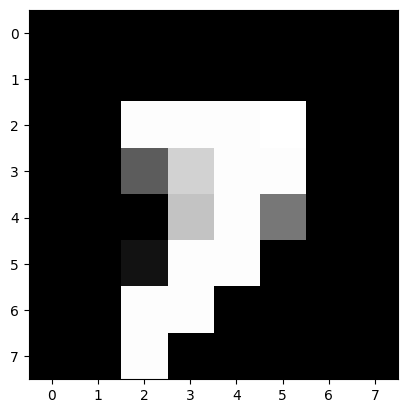

Label: 7, max pooled


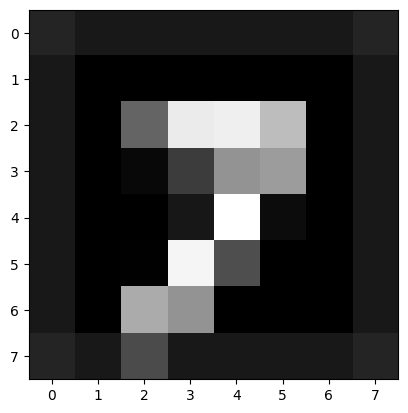

Label: 7, mean pooled


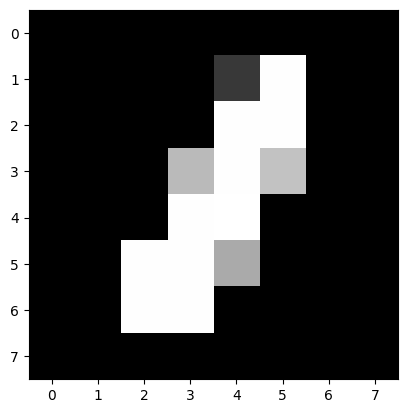

Label: 1, max pooled


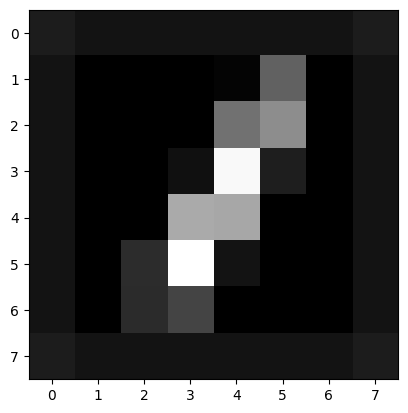

Label: 1, mean pooled


In [57]:
n = 0
for n in range(32):
    img = train_features[n]
    label = train_labels[n]
    max_pooled = max_pool(img)
    mean_pooled = mean_pool(img)
    plt.imshow(max_pooled.squeeze(), cmap="gray")
    plt.show()
    print(f"Label: {label}, max pooled")
    plt.imshow(mean_pooled.squeeze(), cmap="gray")
    plt.show()
    print(f"Label: {label}, mean pooled")

torch.Size([1, 8, 8])


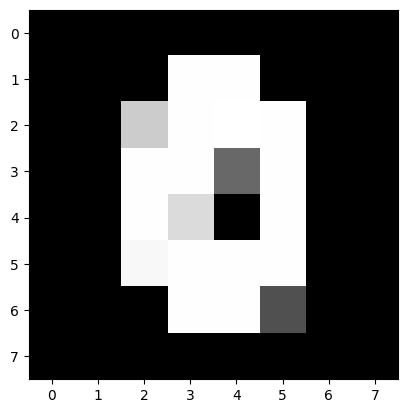

Label: 0


In [58]:
n = 0
img = train_features[n]
label = train_labels[n]
pooled = max_pool(img)
print(pooled.shape)
plt.imshow(pooled.squeeze(), cmap="gray")
plt.show()
print(f"Label: {label}")